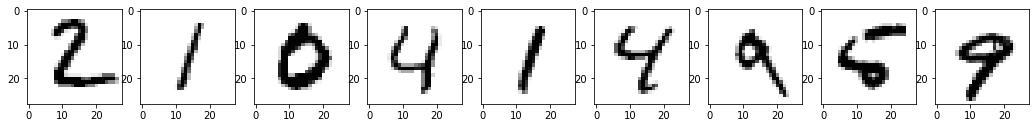

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 14, 14, 8)         2312      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 7, 7, 8)          0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 7, 7, 8)           584       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 4, 4, 8)         

INFO:tensorflow:Assets written to: denoising_autoencoder.model\assets


INFO:tensorflow:Assets written to: denoising_autoencoder.model\assets


313/313 [==============================] - 2s 7ms/step


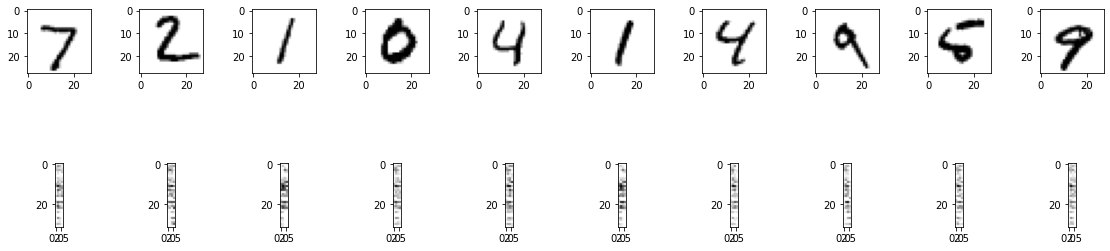

In [6]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential

import numpy as np
import matplotlib.pyplot as plt

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

#Displaying images 
plt.figure(figsize=(20, 2))
for i in range(1,10):
    ax = plt.subplot(1, 10, i)
    plt.imshow(x_test[i].reshape(28, 28), cmap="binary")
plt.show()

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
 
model.add(MaxPooling2D((2, 2), padding='same'))
 
# model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
# model.add(UpSampling2D((2, 2)))
# model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
# model.add(UpSampling2D((2, 2)))
# model.add(Conv2D(32, (3, 3), activation='relu'))
# model.add(UpSampling2D((2, 2)))
# model.add(Conv2D(1, (3, 3), activation='relu', padding='same'))

model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

##@@@@@@@@@model.fit(x_train, x_train, epochs=10, batch_size=256, shuffle=True, 
         #@@@@@@@@@ validation_data=(x_test, x_test))

#@@@@@@@@@@model.evaluate(x_test, x_test)
model.save('denoising_autoencoder.model')
compressed_img = model.predict(x_test)

plt.figure(figsize=(40, 4))
for i in range(10):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap="binary")
    
    # display reconstructed (after noise removed) image
    ax = plt.subplot(3, 20, 40 +i+ 1)
    plt.imshow(compressed_img[i].reshape((4, 4 * 8)).T, cmap="binary")

plt.show()
# https://www.youtube.com/watch?v=Sm54KXD-L1k

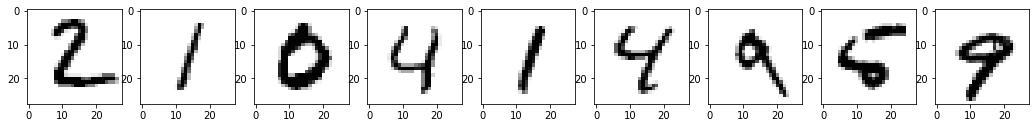

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 14, 8)         2312      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 7, 7, 8)          0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 7, 7, 8)           584       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 4, 4, 8)         

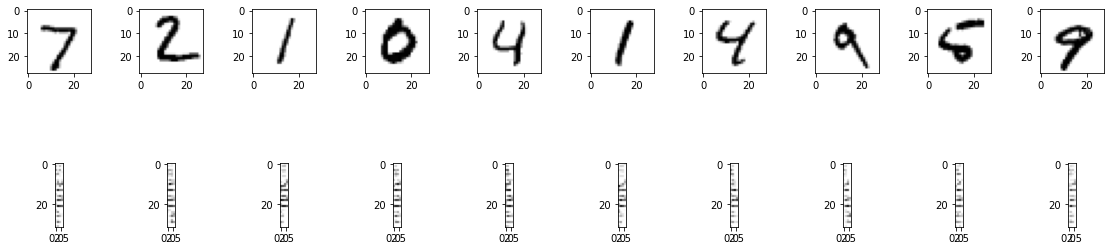

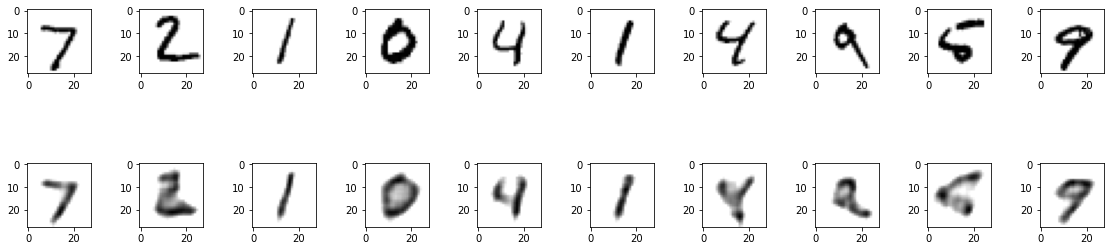

In [17]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential

import numpy as np
import matplotlib.pyplot as plt

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

#Displaying images
plt.figure(figsize=(20, 2))
for i in range(1,10):
    ax = plt.subplot(1, 10, i)
    plt.imshow(x_test[i].reshape(28, 28), cmap="binary")
plt.show()

#Encoder
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))    # 4,4,8

#decoder
model2=Sequential()
model2.add(Conv2D(8, (3, 3), activation='relu', padding='same',input_shape=model.output_shape[1:]))
model2.add(UpSampling2D((2, 2)))
model2.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model2.add(UpSampling2D((2, 2)))
model2.add(Conv2D(32, (3, 3), activation='relu'))
model2.add(UpSampling2D((2, 2)))
model2.add(Conv2D(1, (3, 3), activation='relu', padding='same'))

model.compile(optimizer='adam', loss='mean_squared_error')
model2.compile(optimizer='adam', loss='mean_squared_error')

model.summary()
model2.summary()
compressed_img_train = model.predict(x_train)
compressed_img_test = model.predict(x_test)

model2.fit(compressed_img_train, x_train, epochs=10, batch_size=256, shuffle=True,
         validation_data=(compressed_img_test,x_test))

model2.evaluate(compressed_img_test,x_test )

reconstructed_img = model2.predict(compressed_img_test)

## encoder output
compressed_img = model.predict(x_test)
plt.figure(figsize=(40, 4))
for i in range(10):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap="binary")
    
    # display compressed image
    ax = plt.subplot(3, 20, 40 +i+ 1)
    plt.imshow(compressed_img[i].reshape((4, 4 * 8)).T, cmap="binary")
plt.show()

##decoder output
plt.figure(figsize=(40, 4))
for i in range(10):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap="binary")
    
    # display reconstructed image
    ax = plt.subplot(3, 20, 40 +i+ 1)
    plt.imshow(reconstructed_img[i].reshape(28, 28), cmap="binary")

plt.show()

(1, 1, 8)

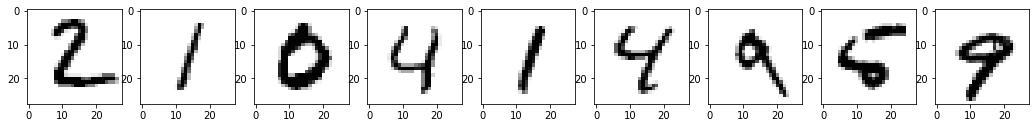

(4, 4, 8)

In [16]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential

import numpy as np
import matplotlib.pyplot as plt

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

#Displaying images
plt.figure(figsize=(20, 2))
for i in range(1,10):
    ax = plt.subplot(1, 10, i)
    plt.imshow(x_test[i].reshape(28, 28), cmap="binary")
plt.show()

#Encoder
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))    # 4,4,8
model.output_shape[1:]  # Exclude the batch size